In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean, median,variance,stdev
from scipy.stats import norm

import pandas as pd
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [2]:
def read_txt(filename):
    data = []
    file = open(filename, 'r')

    for line in file.readlines():
        fname = line.rstrip().split(',') #using rstrip to remove the \n
        data.append(float(fname[1]))

    file.close()
    
    return data

In [3]:
## Load all data ##

In [4]:
all_data = []

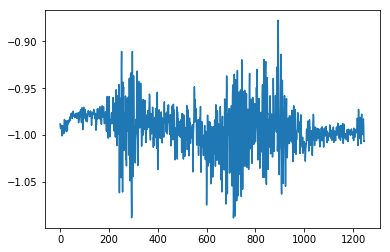

In [21]:
file_name = "JR_Local/chuo/z.txt"
all_data.append(read_txt(file_name))
plt.plot(read_txt(file_name))

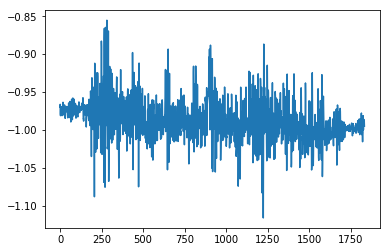

In [22]:
file_name = "JR_Local/sanyo/z.txt"
all_data.append(read_txt(file_name))
plt.plot(read_txt(file_name))

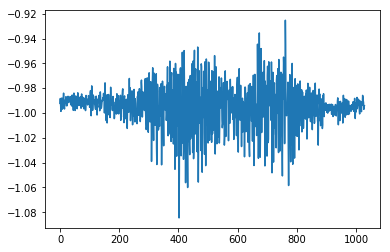

In [23]:
file_name = "JR_Local/yokohama/z.txt"
all_data.append(read_txt(file_name))
plt.plot(read_txt(file_name))

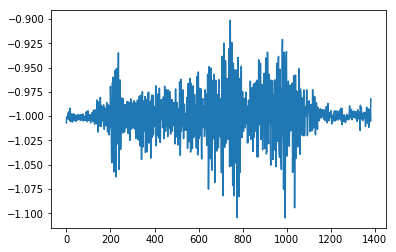

In [24]:
file_name = "JR_Local/oume/z.txt"
all_data.append(read_txt(file_name))
plt.plot(read_txt(file_name))

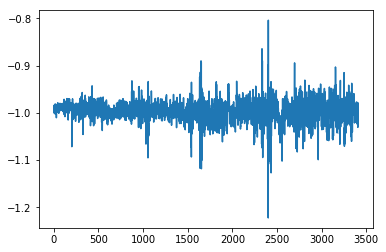

In [25]:
file_name = "JR_Shinkansen/Nagoya2Shinyokohama/z.txt"
all_data.append(read_txt(file_name))
plt.plot(read_txt(file_name))

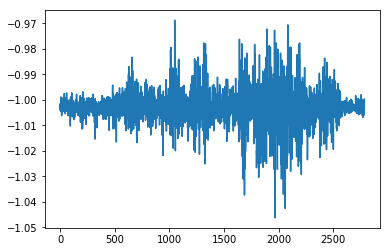

In [26]:
file_name = "ICE/z.txt"
all_data.append(read_txt(file_name))
plt.plot(read_txt(file_name))

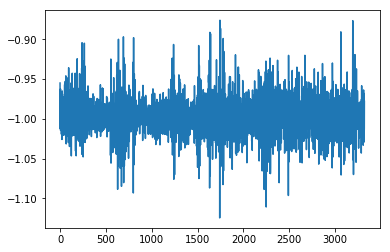

In [27]:
file_name = "IC/g/z.txt"
all_data.append(read_txt(file_name))
plt.plot(read_txt(file_name))

In [12]:
## Same length ##

In [13]:
len(all_data)

7

In [14]:
len_min = 99999999999999
for i in range(0,len(all_data)):
    if (len(all_data[i])<len_min):
        len_min = len(all_data[i])

print(len_min) 

1029


In [15]:
for i in range(0,len(all_data)):
    data_temp = all_data[i]
    all_data[i] = data_temp[0:len_min]

In [16]:
def transform_vector(time_series_array):
    #ベクトルに変換
    stack_list = []
    for j in range(len(time_series_array)):
        data = np.array(time_series_array[j])
        data = data.reshape((1, len(data))).T
        stack_list.append(data)
    #一次元配列にする
    stack_data = np.stack(stack_list, axis=0)
    return stack_data

In [17]:
seed = 0
np.random.seed(seed)

In [18]:
tsdata = np.array(all_data)

In [19]:
for i in range(0, len(all_data)-1):
    print(len(tsdata[i]))

1029
1029
1029
1029
1029
1029


Init 1
0.249 --> 0.249 --> 0.249 --> 0.249 --> 
Init 2
0.233 --> 0.233 --> 
Init 3
Resumed because of empty cluster
Init 3
0.239 --> 0.239 --> 
Init 4
0.318 --> 0.318 --> 
Init 5
0.285 --> 0.285 --> 0.285 --> 0.285 --> 
Init 6
Resumed because of empty cluster
Init 6
0.260 --> 0.261 --> 
Init 7
0.284 --> 0.284 --> 
Init 8
0.284 --> 0.284 --> 0.284 --> 0.284 --> 0.284 --> 0.284 --> 0.283 --> 0.283 --> 0.283 --> 0.283 --> 


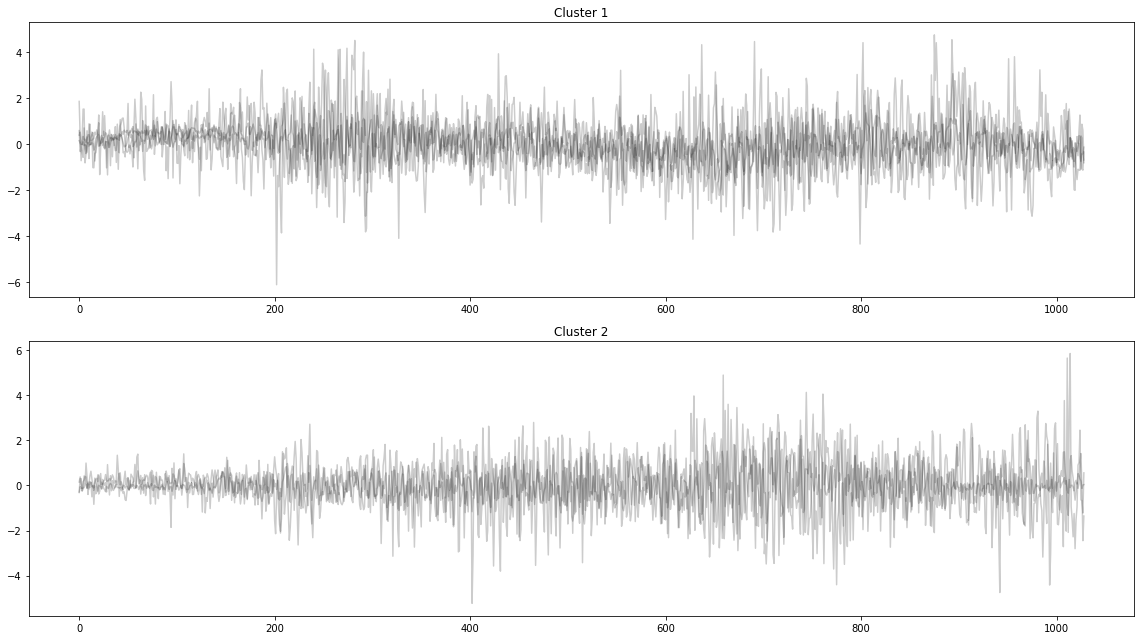

In [20]:
stack_data = transform_vector(tsdata)

#相互相関を計算するために、正規化する必要があります。
#TimeSeriesScalerMeanVarianceがデータを正規化してくれるクラスになります。
stack_data = TimeSeriesScalerMeanVariance(mu=0.0, std=1.0).fit_transform(stack_data)

#KShapeクラスのインスタンス化
ks = KShape(n_clusters=2, n_init=10, verbose=True, random_state=seed)
y_pred = ks.fit_predict(stack_data)

#クラスタリングして可視化
plt.figure(figsize=(16,9))
for yi in range(2):
    plt.subplot(2, 1, 1 + yi)
    for xx in stack_data[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    #plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.title("Cluster %d" % (yi + 1))

plt.tight_layout()
plt.show()

In [28]:
print(y_pred)

[0 0 1 1 0 1 0]
